## Polynomial Regression

```
Steps for any Algorithms
- Read the data 
- Preprocess the data
- import required Algorithms or models
- seperate the input and output data
- Seperate or split the data into training data and testing(optional)
- Train the model
- test the model 
- Evaluate the model
```

In [1]:
import pandas as sday
import matplotlib.pyplot as gr

In [2]:
# 1. Read the data
data = sday.read_csv('https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Machine-Learning-Using-Python-EB8/master/data.csv')
data

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


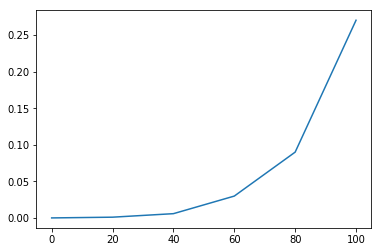

In [3]:
gr.plot(data['Temperature'],data['Pressure'])

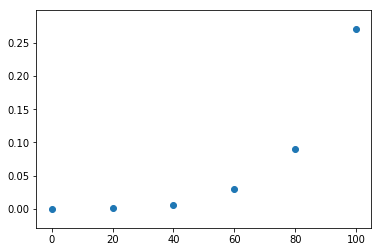

In [4]:
gr.scatter(data['Temperature'],data['Pressure'])

In [10]:
# Seperate the data into input data
input_data = data['Temperature'].values.reshape(-1,1)
input_data

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]], dtype=int64)

In [6]:
# Seperate the data into output data
output_data = data['Pressure']
output_data

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [7]:
# Seperate the training data and testing from original data
# For this data set we are not entering into the split the data into training 
# and testing data because we have not enough data only have 6 rows

In [9]:
# import required Model or Algorithm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [12]:
# Train the model by using fit 
poly = PolynomialFeatures()
linear = LinearRegression()

x_poly = poly.fit_transform(input_data)
# Every Algorithm accept only 2-D Array values.It does not accept 1-D
x_poly

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [13]:
# train the model using fit method for Linear Rzegression
linear.fit(x_poly,output_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# test the model by using predict method
y_pred = linear.predict(x_poly)
y_pred

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

In [16]:
linear.score(x_poly,output_data)*100

95.68461098911794

In [17]:
# Get the output for any new values
linear.predict(poly.fit_transform([[35]]))

array([-0.01580344])

In [18]:
linear.predict(poly.fit_transform([[40]]))

array([-0.01032])

# Classification

Regression:
- Linear Regression
- Polynomial Regression

Classification Algorithms:
- KNN - Classification and Regression
- Logistic Regression
- Decision Tree - Classification and Regression
- Random Forest 
- SVM 
- etc

# KNN ( K- Nearest Neighbours)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [21]:
shirts_data = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/shirt.csv")
shirts_data.head()

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M


In [22]:
# Preprocess the data 
# Checking the null values 
shirts_data.isna().sum()

Height    0
Weight    0
Size      0
dtype: int64

In [23]:
# Seperate the input and output data from original data
input_data = shirts_data[['Height','Weight']]
input_data.head()

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60


In [24]:
output_data = shirts_data['Size']
output_data.head()

0    M
1    M
2    M
3    M
4    M
Name: Size, dtype: object

In [25]:
shirts_data.shape

(18, 3)

In [26]:
# Train the model using fit method
knn = KNeighborsClassifier()
knn.fit(input_data,output_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
help(knn)

Help on KNeighborsClassifier in module sklearn.neighbors.classification object:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of t

In [28]:
# test the model by using predict method
y_pred = knn.predict(input_data)
y_pred

array(['M', 'M', 'M', 'M', 'M', 'L', 'L', 'M', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,output_data)*100

83.33333333333334

In [31]:
confusion_matrix(y_pred,output_data)

array([[10,  2],
       [ 1,  5]], dtype=int64)